


# Tarefa 2

## Modelagem da relação entre o índice de massa corporal (IMC) e a pressão arterial sistólica (PAS)

A base de dados National Health and Nutrition Examination Survey (NHANES) contém uma vasta gama de informações sobre a saúde e nutrição de indivíduos nos Estados Unidos. Neste exercício, vamos utilizar os dados da pesquisa de 2015-2016 para estudar a relação entre o Índice de Massa Corporal (IMC) e a Pressão Arterial Sistólica (PAS) em adultos com idade entre 20 e 60 anos.

**Objetivo:** criar um modelo de regressão linear para prever a Pressão Arterial Sistólica (PAS) a partir do Índice de Massa Corporal (IMC) e avaliar o desempenho deste modelo. Além disso, você deve interpretar os resultados obtidos, com foco na relação entre essas duas variáveis.

## Base de Dados:

Vamos utilizar as seguintes tabelas do NHANES 2015-2016:

- **Demographic Variables:** Contém informações demográficas como idade e sexo.
  - **Atributo de interesse:** RIDAGEYR (Idade em anos)
  - [Link para a tabela](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm)

- **Body Measures:** Contém informações sobre medidas corporais, incluindo o Índice de Massa Corporal (IMC).
  - **Atributo de interesse:** BMXBMI (Índice de Massa Corporal)
  - [Link para a tabela](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm)

- **Blood Pressure:** Contém dados sobre medições de pressão arterial.
  - **Atributo de interesse:** BPXSY1 (Pressão Arterial Sistólica - 1ª Medição)
  - [Link para a tabela](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm)

- **Laboratory Data - Glucose:** Contém dados sobre medições de glicose em jejum.
  - **Atributo de interesse:** LBXGLU (Glicose)
  - [Link para a tabela](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/GLU_I.htm)


Os dados estão disponíveis em formato XPT no seguinte link:
- [Base NHANES 2015-2016](https://wwwn.cdc.gov/nchs/nhanes/search/datapage.aspx?Component=examination)


## Atividades:

1. Carregamento de dados:
  - Baixe e carregue as tabelas necessárias para a análise.

2. Merge dos dados:
  - Realize o merge das três tabelas utilizando o atributo SEQN (número de identificação único de cada participante) como chave.

3. Filtragem dos dados:
  - Selecione os participantes com idade entre 20 e 60 anos (RIDAGEYR).
  - Filtre as colunas de interesse: RIDAGEYR (Idade), BMXBMI (IMC) e BPXSY1 (PAS).

4. Análise exploratória:
  - Visualize a relação entre o Índice de Massa Corporal (IMC), a Pressão Arterial Sistólica (PAS) utilizando gráficos apropriados (por exemplo, scatter plot).

5. Estimativa do modelo:
  - Crie um modelo de regressão linear simples para prever a Pressão Arterial Sistólica (PAS) a partir do Índice de Massa Corporal (IMC).

6. Avaliação do modelo:
  - Avalie a qualidade do modelo usando métricas como o $R^2$, o erro médio absoluto (MAE) ou o erro quadrático médio (MSE).

7. Interprete os coeficientes do modelo.

## Perguntas:

1. Podemos afirmar, com base no modelo, que existe uma relação estatisticamente significativa entre o Índice de Massa Corporal (IMC) e a Pressão Arterial Sistólica (PAS)? Explique.

2. Refaça o exercício para IMC e o nível de glicose no sangue (LBGLU), e IMC e a circunferência da cintura (BMXWAIST). Quais dessas medidas estão correlacionadas?

3. Utilizando o modelo de regressão, qual seria o valor estimado da circunferência da cintura para um indivíduo com IMC igual a 25?

- **Opcional:** verificar possíveis correlações para IMC e o nível de triglicérides (LBXTR) e colesterol total (LBXTC).




In [1]:
# Importando as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Carregando os dados

In [2]:
# URLs das tabelas
url_demo = 'https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.XPT'
url_bmi = 'https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.XPT'
url_bp = 'https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.XPT'

In [3]:
# Carregando as tabelas usando pandas
demographic = pd.read_sas(url_demo)
body_measure = pd.read_sas(url_bmi)
blood_pressure = pd.read_sas(url_bp)

# Juntando os dados

In [4]:
# Merge das tabelas utilizando o atributo 'SEQN' como chave
df = pd.merge(demographic[['SEQN', 'RIDAGEYR']], body_measure[['SEQN', 'BMXBMI']], on='SEQN')
df = pd.merge(df, blood_pressure[['SEQN', 'BPXSY1']], on='SEQN')

Filtrando os dados.

In [5]:
# Filtrando os dados para incluir apenas indivíduos entre 20 e 60 anos
df_filtered = df[(df['RIDAGEYR'] >= 20) & (df['RIDAGEYR'] <= 60)]

In [6]:
# Remover dados faltantes
df_filtered = df_filtered.dropna(subset=['BMXBMI', 'BPXSY1'])

# Análise exploratória da relação entre IMC e PAS

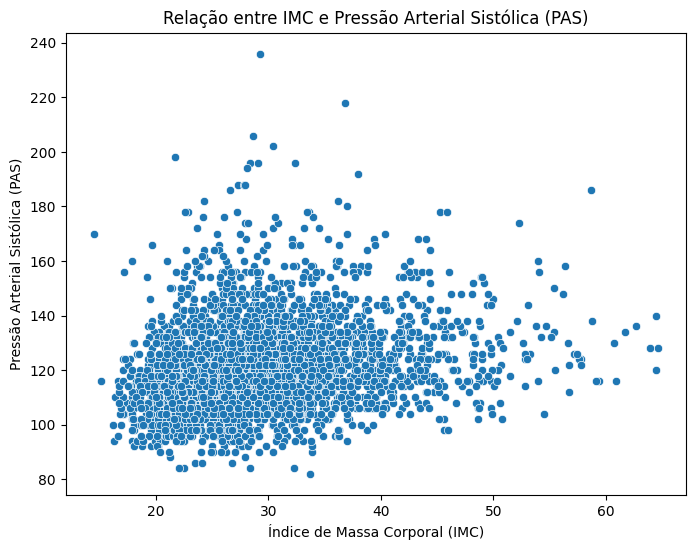

In [7]:
# Visualizar a relação entre IMC e PAS
plt.figure(figsize=(8,6))
sns.scatterplot(x='BMXBMI', y='BPXSY1', data=df_filtered)
plt.title('Relação entre IMC e Pressão Arterial Sistólica (PAS)')
plt.xlabel('Índice de Massa Corporal (IMC)')
plt.ylabel('Pressão Arterial Sistólica (PAS)')
plt.show()

# Definindo o modelo de regressão linear

In [8]:
# Definir as variáveis dependente (X) e independente (y)
X = df_filtered[['BMXBMI']]
y = df_filtered['BPXSY1']

In [9]:
# Criar e treinar o modelo de regressão linear
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [10]:
# Fazer predições
y_pred = model.predict(X)

# Avaliando o ajuste do modelo

In [11]:
# Avaliar o modelo
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
coef = model.coef_[0]

print(f'Erro quadrático médio (MSE): {mse:.2f}')
print(f'Coeficiente da regressão: {coef:.2f}')
print(f'Coeficiente de determinação (R²): {r2:.2f}')


Erro quadrático médio (MSE): 239.35
Coeficiente da regressão: 0.49
Coeficiente de determinação (R²): 0.05


o valor de $𝑅^2$ (coeficiente de determinação) indica a proporção da variação na PAS explicada pelo IMC.

- Se o valor de $R^2$ for próximo de 1, significa que uma grande parte da variação da PAS é explicada pelo IMC, sugerindo uma forte dependência.

- Se o valor de $R^2$ for próximo de 0, significa que o IMC explica muito pouco da variação da PAS, sugerindo independência ou uma relação fraca.

#Interpretando o coeficiente da regressão

Com o coeficiênte da regressão podemos interpretar que a PAS aumenta 0.45 mmHg quando o ICM aumenta $1Kg/m^2$.

## Perguntas:

1. Podemos afirmar, com base no modelo, que existe uma relação estatisticamente significativa entre o Índice de Massa Corporal (IMC) e a Pressão Arterial Sistólica (PAS)?.

**Resposta:** Não, pois, com o modelo regressão linear, observamos que $R^2 = 0,05$. Ou seja, apenas 5% da variação da PAS é explicada pelo IMC.

2. Refaça o exercício para IMC e o nível de glicose no sangue (LBGLU), e IMC e a circunferência da cintura (BMXWAIST). Quais dessas medidas estão correlacionadas?

**Resposta:**

In [16]:
# Importando a base dos nível de glicose no sangue (LBGLU)
url_glucose = 'https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/GLU_I.XPT'
glucose = pd.read_sas(url_glucose)

In [28]:
# Juntando as bases
df1 = pd.merge(demographic[['SEQN', 'RIDAGEYR']], body_measure[['SEQN', 'BMXBMI']], on='SEQN')
df1 = pd.merge(df1, glucose[['SEQN', 'LBXGLU']], on='SEQN')

In [29]:
df1.head()

,SEQN,RIDAGEYR,BMXBMI,LBXGLU
0,83733.0,53.0,30.8,101.0
1,83734.0,78.0,28.8,84.0
2,83736.0,42.0,20.3,84.0
3,83737.0,72.0,28.6,107.0
4,83741.0,22.0,28.0,95.0


In [30]:
# Filtrando os dados para incluir apenas indivíduos entre 20 e 60 anos
df1_filtered = df1[(df1['RIDAGEYR'] >= 20) & (df1['RIDAGEYR'] <= 60)]

In [35]:
# Remover dados faltantes
df1_filtered = df1_filtered.dropna(subset=['BMXBMI', 'LBXGLU'])

In [54]:
# Definir as variáveis dependente (X) e independente (y)
X1 = df1_filtered[['BMXBMI']]
y1 = df1_filtered['LBXGLU']

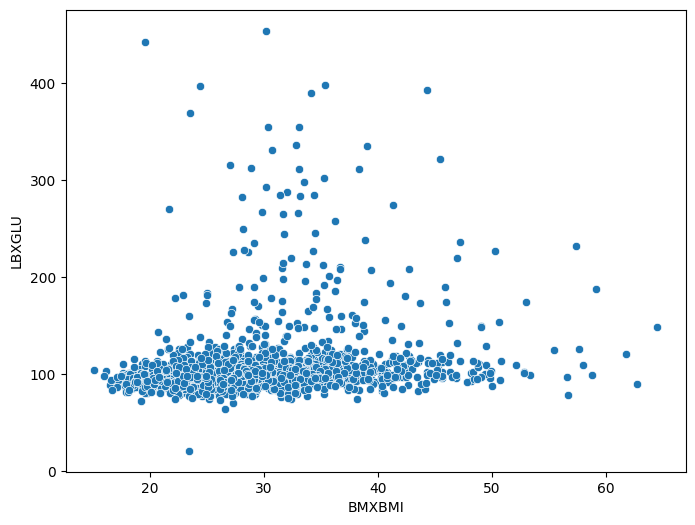

In [55]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='BMXBMI', y='LBXGLU', data=df1_filtered)
plt.show()

In [56]:
# Criar e treinar o modelo de regressão linear
model1 = LinearRegression()
model1.fit(X1, y1)

LinearRegression()

In [57]:
# Fazer predições
y1_pred = model1.predict(X1)

In [58]:
# Avaliar o modelo
mse = mean_squared_error(y1, y1_pred)
r2 = r2_score(y1, y1_pred)
coef = model1.coef_[0]

print(f'Erro quadrático médio (MSE): {mse:.2f}')
print(f'Coeficiente da regressão: {coef:.2f}')
print(f'Coeficiente de determinação (R²): {r2:.2f}')

Erro quadrático médio (MSE): 1390.57
Coeficiente da regressão: 0.97
Coeficiente de determinação (R²): 0.04


Segundo o modelo de regressão linear, o nível de glicose em sangue aumenta 0.97 $mg/dL$ quando o IMC aumenta $1Kg/m^2$. Por outro lado, como $R^2 = 0.04$, não temos evidências de relação significativa entre o ICM e os níveis de glicose em sangue.

# Vamos analisar a relação entre o IMC e a circunferência da cintura.

In [43]:
# Selecionando as variáveis de interesse
base = body_measure[['BMXBMI', 'BMXWAIST']]
base = base.dropna()

In [44]:
base.head()

,BMXBMI,BMXWAIST
0,27.8,101.1
1,30.8,107.9
2,28.8,116.5
3,42.4,110.1
4,20.3,80.4


In [49]:
X2 = base[['BMXBMI']]
y2 = base['BMXWAIST']

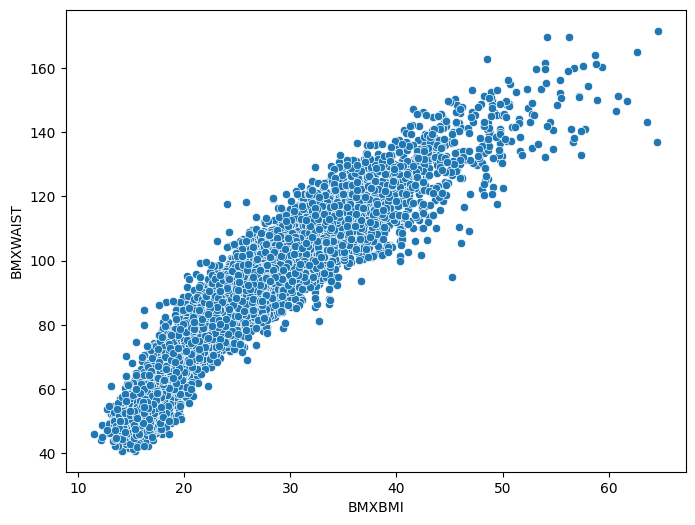

In [50]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='BMXBMI', y='BMXWAIST', data=base)
plt.show()

In [51]:
# Criar e treinar o modelo de regressão linear
model2 = LinearRegression()
model2.fit(X2, y2)

LinearRegression()

In [52]:
# Fazer predições
y2_pred = model2.predict(X2)

In [53]:
# Avaliar o modelo
mse = mean_squared_error(y2, y2_pred)
r2 = r2_score(y2, y2_pred)
coef = model2.coef_[0]

print(f'Erro quadrático médio (MSE): {mse:.2f}')
print(f'Coeficiente da regressão: {coef:.2f}')
print(f'Coeficiente de determinação (R²): {r2:.2f}')

Erro quadrático médio (MSE): 63.31
Coeficiente da regressão: 2.71
Coeficiente de determinação (R²): 0.88


Para este modelo temos evidência de relação significativa entre ICM e a Circunferência da Cintura, pois $R^2 = 0.88$

3. Utilizando o modelo de regressão, qual seria o valor estimado da circunferência da cintura para um indivíduo com IMC igual a 25?

**Resposta:** Para ICM = 25Kg/$m^2$ temos que a Circunferência da Cintura estimada é 25$\times$2.71 = 67.65 cm.